# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
% tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [2]:
#Load CIFAR10 dataset available within tensorflow
(train_x, train_y),(test_x,test_y) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print ('Shape of train_x :', train_x.shape)
print ('Shape of test_x :', test_x.shape)
print ('Shape of train_y :', train_y.shape)
print ('Shape of test_y :', test_y.shape)


Shape of train_x : (50000, 32, 32, 3)
Shape of test_x : (10000, 32, 32, 3)
Shape of train_y : (50000, 1)
Shape of test_y : (10000, 1)


Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
# to normalize train_x and test_x
x_train = train_x/255
x_test = test_x/255

In [0]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(train_y, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_y, num_classes=10)

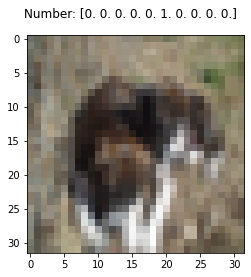

In [9]:
#Let's review the data
import numpy as np
import matplotlib.pyplot as plt
img_num = np.random.randint(0, test_x.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(test_x[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
# Sequential
model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# 2nd CNN layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Max pool layer 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # dropout = 25%

# third CNN layer 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# 4th CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# max pool  2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout = 25%

# Flattening the layer 
model.add(Flatten())

# Dens layer 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # drpout

# Output layer 
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./cifar.h5', 
                                           monitor='val_acc', save_best_only=True)

In [16]:
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=5,
          batch_size=32, callbacks=[mckpt],workers=4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 15s 296us/sample - loss: 1.5420 - accuracy: 0.4360 - val_loss: 1.1585 - val_accuracy: 0.5875
Epoch 2/5
50000/50000 [==============================] - 8s 163us/sample - loss: 1.1338 - accuracy: 0.5985 - val_loss: 0.9729 - val_accuracy: 0.6568
Epoch 3/5
50000/50000 [==============================] - 8s 167us/sample - loss: 0.9923 - accuracy: 0.6510 - val_loss: 0.8816 - val_accuracy: 0.6939
Epoch 4/5
50000/50000 [==============================] - 8s 165us/sample - loss: 0.8975 - accuracy: 0.6852 - val_loss: 0.8054 - val_accuracy: 0.7209
Epoch 5/5
50000/50000 [==============================] - 8s 166us/sample - loss: 0.8298 - accuracy: 0.7083 - val_loss: 0.7749 - val_accuracy: 0.7286


In [17]:
# again training for 50 more epochs 
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=50,
          batch_size=32, callbacks=[mckpt],workers=4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 163us/sample - loss: 0.7793 - accuracy: 0.7261 - val_loss: 0.7351 - val_accuracy: 0.7487
Epoch 2/50
50000/50000 [==============================] - 8s 165us/sample - loss: 0.7402 - accuracy: 0.7404 - val_loss: 0.7195 - val_accuracy: 0.7547
Epoch 3/50
50000/50000 [==============================] - 8s 164us/sample - loss: 0.7108 - accuracy: 0.7523 - val_loss: 0.6849 - val_accuracy: 0.7701
Epoch 4/50
50000/50000 [==============================] - 8s 163us/sample - loss: 0.6839 - accuracy: 0.7609 - val_loss: 0.6593 - val_accuracy: 0.7741
Epoch 5/50
50000/50000 [==============================] - 8s 163us/sample - loss: 0.6587 - accuracy: 0.7680 - val_loss: 0.6685 - val_accuracy: 0.7790
Epoch 6/50
50000/50000 [==============================] - 8s 163us/sample - loss: 0.6374 - accuracy: 0.7759 - val_loss: 0.6647 - val_accuracy: 0.7744
Epoch 7/50
50000/50000 [==========================

In [0]:
# Predicting on test data 
y_pred_class = model.predict_classes(x_test)

In [19]:
# calculate accuracy of class predictions
from sklearn import metrics
# Score CNN model
metrics.accuracy_score(test_y, y_pred_class)

0.7951

In [20]:
# Classification report  CNN model
print(metrics.classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.94      0.86      0.90      1000
           2       0.75      0.69      0.72      1000
           3       0.62      0.63      0.62      1000
           4       0.80      0.73      0.76      1000
           5       0.68      0.75      0.71      1000
           6       0.75      0.90      0.82      1000
           7       0.90      0.81      0.85      1000
           8       0.82      0.92      0.87      1000
           9       0.85      0.90      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import array_to_img,load_img,img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/ANN DL/Image')

# load an image from file
image = load_img('/content/drive/My Drive/ANN DL/Image/49436743043_2441587ab9_c.jpg', target_size=(224, 224))

In [49]:
# using loop opreation for fectching 4 images and applying pre-processing 
images = []
for img in os.listdir(r'/content/drive/My Drive/ANN DL/Image/'):
    print(img)
    img = load_img(r'/content/drive/My Drive/ANN DL/Image' +'/'+ img, target_size=(224, 224))
    #print(plt.imshow(img))
    img = img_to_array(img)
    img = img2.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    images.append(img)
images = np.vstack(images)


49436743043_2441587ab9_c.jpg
49438170746_8378201627_c.jpg
4994221690_d070e8a355_c.jpg
49441887332_107afa786d_c.jpg


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [50]:
# convert the image pixels to a numpy array
image_array = img_to_array(image)

# Check shape of image
print ('shape of image_array',image_array.shape)

shape of image_array (224, 224, 3)


In [51]:
# reshape data for the model
image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
print ('shape of image_array',image_array.shape)

shape of image_array (1, 224, 224, 3)


In [0]:
# prepare the image for the VGG model
image_vgg16 = preprocess_input(image_array)

In [0]:
# load the model
model = VGG16()

In [54]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
y_perd = model.predict(image_vgg16)

In [0]:
# convert the probabilities to class labels
label = decode_predictions(y_perd)


In [74]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
label

('n01833805', 'hummingbird', 0.36529168)

#NLP

## Question 1

Read file 'tweets.csv'

In [4]:
import pandas as pd

In [5]:
tweets = pd.read_csv('tweets.csv',encoding = 'mac_roman')

In [7]:
print ('shape of tweets',tweets.shape)

shape of tweets (9093, 3)


**Drop null values**

*   Drop all the rows with null values




In [8]:
df = tweets.dropna()

In [9]:
print ('shape of df',df.shape)

shape of df (3291, 3)


**Print the dataframe**
*   print initial 5 rows of the data


In [10]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [11]:
import re

In [12]:
df['tweet_text'] = df['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['tweet_text'] = df['tweet_text'].apply(lambda s: s.lower())

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df['tweet_text'] = df['tweet_text'].apply(lambda s: s.strip())

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion


## Question 3

In [15]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [16]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [17]:
df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion') | (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]

In [18]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion


##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [20]:
df['label']= df.is_there_an_emotion_directed_at_a_brand_or_product.map({'Negative emotion': 0, 'Positive emotion':1})

In [22]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,label
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion,0
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion,1
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion,1
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion,0
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [23]:
x = df.tweet_text

In [24]:
y=df.is_there_an_emotion_directed_at_a_brand_or_product

In [25]:
print('shape of x',x.shape)
print('shape of y',y.shape)

shape of x (3191,)
shape of y (3191,)


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [29]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [30]:
# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size = 0.25)

In [31]:
X_train.shape

(2393,)

In [32]:
X_test.shape

(798,)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [33]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [34]:
# use logistic regression with text column only
logreg = LogisticRegression()


### Fit the classifer
- fit logistic regression classifier

In [35]:
logreg.fit(X_train_dtm, y_train)


C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [36]:
 nb = MultinomialNB()


### Fit the classifer
- fit naive bayes classifier

In [37]:
nb.fit(X_train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [38]:
y_pred_class_l = logreg.predict(X_test_dtm)


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [39]:
y_pred_class_nb = nb.predict(X_test_dtm)


## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [40]:
print(metrics.accuracy_score(y_test, y_pred_class_l))

0.8609022556390977


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [41]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class_nb))

Accuracy:  0.8583959899749374
